In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob

In [13]:
all_file =sorted(glob('Sales_Data/Sales_*_2019.csv'))
all_file

['Sales_Data/Sales_April_2019.csv',
 'Sales_Data/Sales_August_2019.csv',
 'Sales_Data/Sales_December_2019.csv',
 'Sales_Data/Sales_February_2019.csv',
 'Sales_Data/Sales_January_2019.csv',
 'Sales_Data/Sales_July_2019.csv',
 'Sales_Data/Sales_June_2019.csv',
 'Sales_Data/Sales_March_2019.csv',
 'Sales_Data/Sales_May_2019.csv',
 'Sales_Data/Sales_November_2019.csv',
 'Sales_Data/Sales_October_2019.csv',
 'Sales_Data/Sales_September_2019.csv']

In [17]:
all_file=pd.concat((pd.read_csv(file).assign(filename=file)for file in all_file ),ignore_index= True)

In [22]:
all_file.to_csv('all_file.csv',index=False)

In [23]:
df=pd.read_csv('all_file.csv')
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,filename
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Sales_Data/Sales_April_2019.csv
1,NaN,NaN,NaN,NaN,NaN,NaN,Sales_Data/Sales_April_2019.csv
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Sales_Data/Sales_April_2019.csv
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_Data/Sales_April_2019.csv
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_Data/Sales_April_2019.csv
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",Sales_Data/Sales_September_2019.csv
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",Sales_Data/Sales_September_2019.csv
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",Sales_Data/Sales_September_2019.csv
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",Sales_Data/Sales_September_2019.csv


In [75]:
df.drop(columns='filename',inplace=True)

In [29]:
df['Month']=df['Order Date'].str[0:2]
df['Month']=df['Month'].astype('int32')

ValueError: cannot convert float NaN to integer

In [32]:
# Clean the NAN values

nan_df =df[df.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,filename,Month
1,NaN,NaN,NaN,NaN,NaN,NaN,Sales_Data/Sales_April_2019.csv,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN,Sales_Data/Sales_April_2019.csv,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN,Sales_Data/Sales_April_2019.csv,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN,Sales_Data/Sales_April_2019.csv,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN,Sales_Data/Sales_April_2019.csv,NaN


In [33]:
df=df.dropna(how='any')

In [36]:
df['Month']=df['Order Date'].str[0:2]
df['Month']=df['Month'].astype('int32')

/var/folders/t5/xxnmwpw911d2hs_x9j3p_ckc0000gn/T/ipykernel_698/3117770280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month']=df['Order Date'].str[0:2]


ValueError: invalid literal for int() with base 10: 'Or'

In [38]:
# Find 'OR' and delete it

temp_df=df[df['Order Date'].str[0:2]=='Or']
temp_df.head()



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,filename,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales_Data/Sales_April_2019.csv,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales_Data/Sales_April_2019.csv,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales_Data/Sales_April_2019.csv,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales_Data/Sales_April_2019.csv,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales_Data/Sales_April_2019.csv,Or


In [39]:
df=df[df['Order Date'].str[0:2]!='Or']
df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,filename,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Sales_Data/Sales_April_2019.csv,04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Sales_Data/Sales_April_2019.csv,04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_Data/Sales_April_2019.csv,04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_Data/Sales_April_2019.csv,04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Sales_Data/Sales_April_2019.csv,04


In [41]:
df['Month']=df['Order Date'].str[0:2]
df['Month']=df['Month'].astype('int32')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,filename,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Sales_Data/Sales_April_2019.csv,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Sales_Data/Sales_April_2019.csv,4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_Data/Sales_April_2019.csv,4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_Data/Sales_April_2019.csv,4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Sales_Data/Sales_April_2019.csv,4


In [46]:
# Add a sales column

df['Sales']=df['Quantity Ordered']* df['Price Each']

TypeError: can't multiply sequence by non-int of type 'str'

In [47]:
# Convert the data type

df['Quantity Ordered']=pd.to_numeric(df['Quantity Ordered'])
df['Price Each']= pd.to_numeric(df['Price Each'])

In [49]:
df['Sales']=df['Quantity Ordered']* df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,filename,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Sales_Data/Sales_April_2019.csv,4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Sales_Data/Sales_April_2019.csv,4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_Data/Sales_April_2019.csv,4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_Data/Sales_April_2019.csv,4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Sales_Data/Sales_April_2019.csv,4,11.99


In [66]:
# Q What was the best month for sales? How much earned that month?
results=df.groupby('Month').sum()
results.head(12)

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


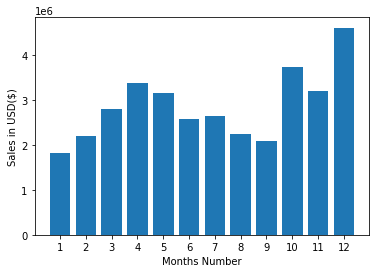

In [65]:
months=range(1,13)
plt.bar(months,results['Sales'])
plt.xlabel('Months Number')
plt.ylabel('Sales in USD($)')
plt.xticks(months)
plt.show()


In [89]:
######2  What City had the highest number of sales?

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [100]:
# Task 4: Add a city column

df['City']=df['Purchase Address'].apply(lambda x: x.split(',')[1])

#df['City']=df['Purchase Address'].apply(lambda x: get_city(x) + ' ' + get_state(x))



In [85]:
# As we add city , there is chances of getting duplicate city with same names

def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split('.')[2].split('')[1]

 

In [108]:
city_sales=df.groupby('City').sum()
city_sales.head(10)

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta,16602,2779908.20,104794,2795498.58
Austin,11153,1809873.61,69829,1819581.75
Boston,22528,3637409.77,141112,3661642.01
Dallas,16730,2752627.82,104620,2767975.40
Los Angeles,33289,5421435.23,208325,5452570.80
New York City,27932,4635370.83,175741,4664317.43
Portland,14053,2307747.47,87765,2320490.61
San Francisco,50239,8211461.74,315520,8262203.91
Seattle,16553,2733296.01,104941,2747755.48


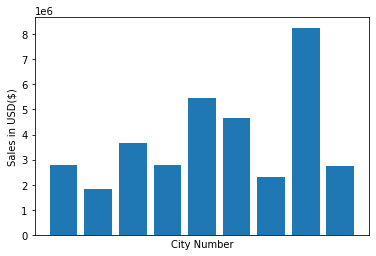

In [111]:
cities=[city for city,df in df.groupby('City')]                #  cities=df['City'].unique()
plt.bar(cities,city_sales['Sales'])
plt.xlabel('City Number')
plt.ylabel('Sales in USD($)')
plt.xticks('city name')
plt.show()

In [112]:
##### Question 3  What time should we display advertisement to maximize the likelihood of customer buying product?

df['Order Date']=pd.to_datetime(df['Order Date'])

In [114]:
df.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int32
Sales                      float64
City                        object
dtype: object

In [116]:
df['Hour']=df['Order Date'].dt.hour
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9


In [118]:
df['Minute']=df['Order Date'].dt.minute
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,27


In [140]:
hour=df.groupby('Hour').sum().sort_values(by='Quantity Ordered',ascending=False)
hour.head(100)

,Quantity Ordered,Price Each,Month,Sales,Minute
Hour,,,,,
19,14470,2398588.31,91389,2412938.54,381042
12,14202,2299876.68,89161,2316821.34,368679
11,14005,2288855.18,87654,2300610.24,368952
18,13802,2207696.93,86421,2219348.30,371688
20,13768,2268185.16,86375,2281716.24,354086
13,13685,2139743.86,85808,2155389.80,351045
14,12362,2072194.77,77836,2083672.73,322563
10,12308,1932665.62,76928,1944286.77,331941
21,12244,2030763.83,77103,2042000.86,312062


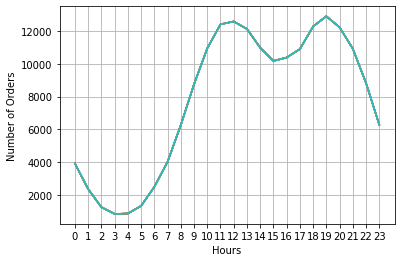

In [139]:
hours=[time for time,df in df.groupby('Hour')]
plt.plot(hours,df.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

In [153]:
##### Question 4 : What products are most often sold together?

## Task 5 : Drop all duplicated values

df1=df[df['Order ID'].duplicated(keep=False)]
df1



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,38
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19,42
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,19,42
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston,11,31
...,...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta,20,18
186803,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta,0,25
186804,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta,0,25
186841,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco,13,49


In [155]:
df1['Grouped']=df1.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
df1.head(100)

/var/folders/t5/xxnmwpw911d2hs_x9j3p_ckc0000gn/T/ipykernel_698/2877198652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Grouped']=df1.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston,11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1077,177582,Bose SoundSport Headphones,1,99.99,2019-04-16 17:19:00,"707 9th St, Dallas, TX 75001",4,99.99,Dallas,17,19,"Bose SoundSport Headphones,Wired Headphones"
1078,177582,Wired Headphones,1,11.99,2019-04-16 17:19:00,"707 9th St, Dallas, TX 75001",4,11.99,Dallas,17,19,"Bose SoundSport Headphones,Wired Headphones"
1088,177592,iPhone,1,700.00,2019-04-19 11:10:00,"448 Maple St, San Francisco, CA 94016",4,700.00,San Francisco,11,10,"iPhone,Lightning Charging Cable"
1089,177592,Lightning Charging Cable,2,14.95,2019-04-19 11:10:00,"448 Maple St, San Francisco, CA 94016",4,29.90,San Francisco,11,10,"iPhone,Lightning Charging Cable"


In [156]:
df1=df1[['Order ID','Grouped']].drop_duplicates()
df1.head(100)

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
2662,179108,"Lightning Charging Cable,AAA Batteries (4-pack)"
2683,179128,"iPhone,Apple Airpods Headphones"
2718,179162,"Google Phone,USB-C Charging Cable"
2783,179226,"34in Ultrawide Monitor,Macbook Pro Laptop"


In [162]:
# Counting unique pairs of numbers into a python dictionary

from itertools import combinations
from collections import Counter

count =Counter()

for row in df1['Grouped']:
    row_list =row.split(',')
    count.update(Counter(combinations(row_list,2)))

#print(count)

count.most_common(20)



[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92),
 (('Lightning Charging Cable', 'Apple Airpods Headphones'), 81),
 (('Vareebadd Phone', 'Bose SoundSport Headphones'), 80),
 (('USB-C Charging Cable', 'Bose SoundSport Headphones'), 77),
 (('Apple Airpods Headphones', 'Wired Headphones'), 69),
 (('Lightning Charging Cable', 'USB-C Charging Cable'), 58),
 (('Lightning Charging Cable', 'AA Batteries (4-pack)'), 55),
 (('Lightning Charging Cable', 'Lightning Charging Cable'), 54),
 (('Bose SoundSport Headphones', 'Wired Headphones'), 53),
 (('AA B

In [163]:
products=df.groupby('Product').sum().sort_values(by='Quantity Ordered',ascending=False)
products


,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
Product,,,,,,
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332,612113
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039
USB-C Charging Cable,23975,261740.85,154819,286501.25,314645,647586
Lightning Charging Cable,23217,323787.10,153092,347094.15,312529,634442
Wired Headphones,20557,226395.18,133397,246478.43,271720,554023
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304,455570
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445,392603
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,219948
iPhone,6849,4789400.00,47941,4794300.00,98657,201688


In [172]:
prices=df.groupby('Product').mean()['Price Each']
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64